In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv, glob, os

In [2]:
problem_name = 'benchmark'
report_directories = ['../dual_report_L_test', '../primal_report_L_test']

In [3]:
filess = [glob.glob(os.path.join(report_directory, 'VARL_*_steps_9_' + problem_name + '_L_test_LSCHEME/0' + str(val) + '_' + problem_name +'*.csv'), recursive=True) for report_directory, val in zip(report_directories, ['40', '40'])]

In [4]:
sorted_filess = [{}, {}]
sorted_iterationss = [{}, {}]

In [5]:
for files, sorted_files in zip(filess, sorted_filess):
    for file in files:
        L_value = int(file[file[:file.find('_steps_')].rfind('_')+1 : file.find('_steps_')]) * 1e-3
        print(file, str(L_value))

        sorted_files[L_value] = file

    sorted_files = dict(sorted(sorted_files.items()))

../dual_report_L_test/VARL_23_steps_9_benchmark_L_test_LSCHEME/040_benchmark_L_test_LSCHEME_richards_solver.csv 0.023
../dual_report_L_test/VARL_24_steps_9_benchmark_L_test_LSCHEME/040_benchmark_L_test_LSCHEME_richards_solver.csv 0.024
../dual_report_L_test/VARL_25_steps_9_benchmark_L_test_LSCHEME/040_benchmark_L_test_LSCHEME_richards_solver.csv 0.025
../dual_report_L_test/VARL_26_steps_9_benchmark_L_test_LSCHEME/040_benchmark_L_test_LSCHEME_richards_solver.csv 0.026000000000000002
../dual_report_L_test/VARL_27_steps_9_benchmark_L_test_LSCHEME/040_benchmark_L_test_LSCHEME_richards_solver.csv 0.027
../dual_report_L_test/VARL_28_steps_9_benchmark_L_test_LSCHEME/040_benchmark_L_test_LSCHEME_richards_solver.csv 0.028
../dual_report_L_test/VARL_29_steps_9_benchmark_L_test_LSCHEME/040_benchmark_L_test_LSCHEME_richards_solver.csv 0.029
../dual_report_L_test/VARL_30_steps_9_benchmark_L_test_LSCHEME/040_benchmark_L_test_LSCHEME_richards_solver.csv 0.03
../dual_report_L_test/VARL_31_steps_9_benc

In [6]:
for sorted_files, sorted_iterations in zip(sorted_filess, sorted_iterationss):
    for L_value in sorted_files:

        with open(sorted_files[L_value], 'r') as csvfile:
            lines = csv.reader(csvfile, delimiter=',')
            sorted_iterations[L_value] = (sum(1 for row in lines))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


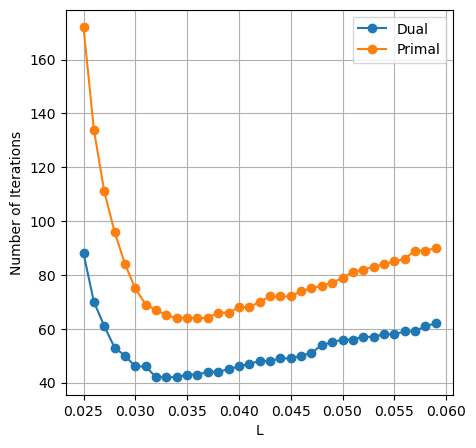

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.plot( list(sorted_iterationss[0].keys())[2:], [(sorted_iterationss[0])[ll] for ll in list(sorted_iterationss[0].keys())[2:]], 'o-' )
ax.plot( list(sorted_iterationss[1].keys())[2:], [(sorted_iterationss[1])[ll] for ll in list(sorted_iterationss[1].keys())[2:]], 'o-' )

ax.grid()

ax.set_xlabel('L')
ax.set_ylabel('Number of Iterations')

ax.legend(['Dual', 'Primal'])

plt.savefig('L_scheme_L_comparison.eps', format='eps')